 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8892/notebooks/scipy_lab4.ipynb#using-the-scipy-ivp-(initial-value-problem)-packages" data-toc-modified-id="using-the-scipy-ivp-(initial-value-problem)-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>using the scipy ivp (initial value problem) packages</a></span></li><li><span><a href="http://localhost:8892/notebooks/scipy_lab4.ipynb#Installation" data-toc-modified-id="Installation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installation</a></span><ul class="toc-item"><li><span><a href="http://localhost:8892/notebooks/scipy_lab4.ipynb#First-rerun-the-lab-4-cell" data-toc-modified-id="First-rerun-the-lab-4-cell-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First rerun the lab 4 cell</a></span></li><li><span><a href="http://localhost:8892/notebooks/scipy_lab4.ipynb#now-use-scipy.integrate.solve_ivp" data-toc-modified-id="now-use-scipy.integrate.solve_ivp-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>now use <a href="https://scipy.github.io/devdocs/generated/scipy.integrate.solve_ivp.html" target="_blank">scipy.integrate.solve_ivp</a></a></span><ul class="toc-item"><li><span><a href="http://localhost:8892/notebooks/scipy_lab4.ipynb#set-the-problem-up-and-use-the-RK45-method-to-solve-it" data-toc-modified-id="set-the-problem-up-and-use-the-RK45-method-to-solve-it-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>set the problem up and use the RK45 method to solve it</a></span></li></ul></li></ul></li></ul></div>

# using the scipy ivp (initial value problem) packages

Here is the oscillator ode from lab 4 -- below I show how to solve it using the new built-in scipy solver.  Since this new scipy release is still in beta, I copied the ivp package into its own repository called eos_integrate.

# Installation

    git clone https://github.com/phaustin/eos_integrate.git
    cd eos_integrate
    pip install .

## First rerun the lab 4 cell

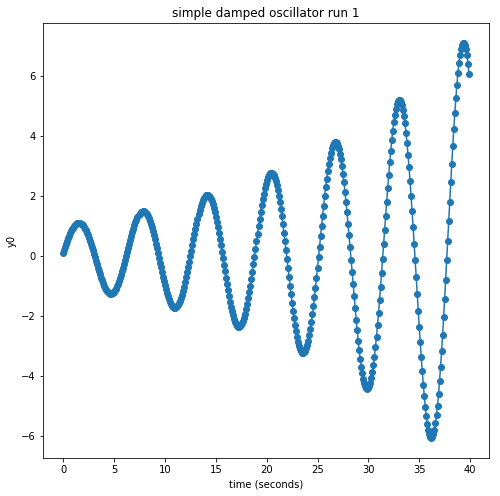

In [4]:
%matplotlib inline

import json
from numlabs.lab4.example.test import read_init,euler4
import numpy as np
from matplotlib import pyplot as plt
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=euler4(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       



## now use [scipy.integrate.solve_ivp](https://scipy.github.io/devdocs/generated/scipy.integrate.solve_ivp.html)

If you click on the link above you will see that, to use solve_ivp the derivative function has to have (t,y) as the only arguments.  From the documentation:

fun : callable

   Right-hand side of the system. The calling signature is fun(t, y). Here t is a scalar and there are two options for    ndarray y.
   
But our derivs function looks like this:

In [ ]:
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

We need to write a factory function that can create another function with the required (t, y) signature.  This is called a [closure](http://www.discoversdk.com/blog/closures-in-python-3).

In [5]:
def derivs_factory(derivs,coeff):
    """
      create a derivatives function with the correct signature using
      this factory, for example:
      
      my_deriv_fun=derivs_factory(the_derivs,the_coeffs)
    """
    def new_derivs(t,y):
        return derivs(coeff,y)
    return new_derivs

### set the problem up and use the RK45 method to solve it

In [10]:
from eos_integrate import solve_ivp
infile='run_1.json'
coeff=read_init(infile)
fun = derivs_factory(derivs,coeff)
tspan=coeff.t_beg,coeff.t_end
teval=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
yinit=coeff.yinitial
result = solve_ivp(fun,tspan,yinit,method='RK45',t_eval=teval)

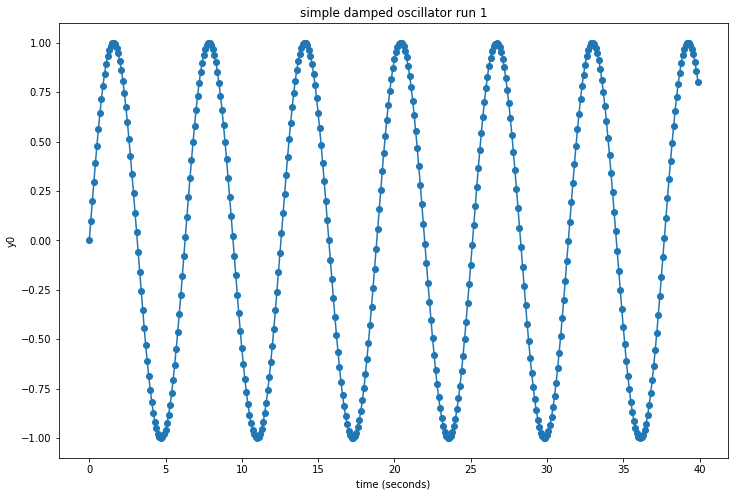

In [15]:
theFig,theAx=plt.subplots(1,1,figsize=(12,8))
theAx.plot(result.t,result.y[0,:],'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');  